In [88]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

In [89]:
url = "http://books.toscrape.com/"

# TODO: Use `requests` to do an HTTP request to fetch data located at that URL
# TODO: Create a `BeautifulSoup` instance with that data

response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

In [90]:
books_html = soup.find_all("article",class_="product_pod")

## Parsing _one_ book

In [91]:
books_html[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [92]:
book_title = books_html[0].find("h3").find("a").attrs["title"]

In [108]:
book_price = float(books_html[0].find(class_="price_color").text[1:])

In [94]:
book_stars_html = books_html[0].find("p", class_="star-rating").attrs['class']

In [95]:
def parse_rating(rating_classes):
    if 'One' in rating_classes:
        return 1
    elif 'Two' in rating_classes:
        return 2
    elif 'Three' in rating_classes:
        return 3
    elif 'Four' in rating_classes:
        return 4
    elif 'Five' in rating_classes:
        return 5
    else:
        return 0

In [96]:
book_rating = parse_rating(book_stars_html)
book_rating

3

## Parsing _all_ books

In [111]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }
for i in books_html:
    title = i.find("h3").find("a").attrs["title"]
    price = float(i.find(class_="price_color").text[1:])
    rating = parse_rating(i.find("p", class_="star-rating").attrs['class'])
    books_dict["Title"].append(title)
    books_dict["Price"].append(price)
    books_dict["Rating"].append(rating)


In [112]:
books_dict

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  3

In [113]:
len(books_dict)  

3

In [114]:
len(books_dict["Title"])

20

# Loading data in Pandas

In [117]:
books_df = pd.DataFrame.from_dict(books_dict)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


<AxesSubplot:xlabel='Rating'>

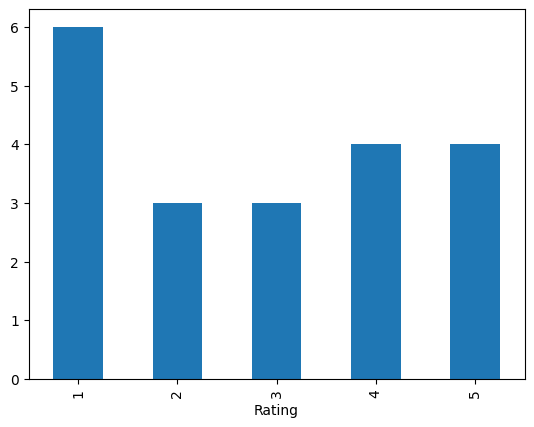

In [102]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [118]:
from nbresult import ChallengeResult

result = ChallengeResult('books',
    columns=books_df.columns,
    title=str(books_df.loc[0,'Title']),
    price=books_df.loc[0,'Price'],
    rating=books_df.loc[0,'Rating']
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/pbn/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/pbn/code/pbn327/02-Data-Toolkit/02-Data-Sourcing/data-book_scraping/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 5 items

test_books.py::TestBooks::test_books_df_columns_name PASSED              [ 20%]
test_books.py::TestBooks::test_books_df_columns_size PASSED              [ 40%]
test_books.py::TestBooks::test_first_book_price PASSED                   [ 60%]
test_books.py::TestBooks::test_first_book_rating PASSED                  [ 80%]
test_books.py::TestBooks::test_first_book_title PASSED                   [100%]

============================== 5 passed in 0.92s ===============================


💯 You can commit your code:

git add tests/books.pickle

git commit -m 'Completed books step'

git push origi

In [120]:
!git add tests/books.pickle

!git commit -m 'Completed books step'

!git push origin master

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   scraping.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
Enumerating objects: 15, done.
Counting objects: 100% (15/15), done.
Delta compression using up to 8 threads
Compressing objects: 100% (13/13), done.
Writing objects: 100% (15/15), 1.17 MiB | 4.74 MiB/s, done.
Total 15 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), done.
To github.com:pbn327/data-book_scraping.git
 * [new branch]      master -> master


In [121]:
page = 1
url = f"http://books.toscrape.com/catalogue/page-{page}.html"
url

'http://books.toscrape.com/catalogue/page-1.html'

In [128]:
all_books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

MAX_PAGE = 50
for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    all_books_html = soup.find_all("article", class_="product_pod")
    for i in all_books_html:
        title = i.find("h3").find("a").attrs["title"]
        price = float(i.find(class_="price_color").text[1:])
        rating = parse_rating(i.find("p", class_="star-rating").attrs['class'])
        all_books_dict["Title"].append(title)
        all_books_dict["Price"].append(price)
        all_books_dict["Rating"].append(rating)
print("Done!")

Done!


In [129]:
all_books_dict

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas",
  'In Her Wake',
  'How Music Works',
  'Foolproof Preserving: A Guide to Small Batch Jams, Jellies, Pickles, Condiments, and More: A Foolproof Guide to Making Smal

In [130]:
len(all_books_dict["Title"])

1000

In [131]:
all_books_df = pd.DataFrame.from_dict(all_books_dict)
all_books_df.tail()

,Title,Price,Rating
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,4
997,A Spy's Devotion (The Regency Spies of London #1),16.97,5
998,1st to Die (Women's Murder Club #1),53.98,1
999,"1,000 Places to See Before You Die",26.08,5


<AxesSubplot:>

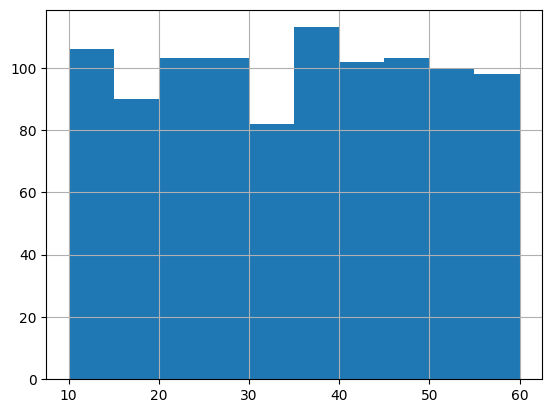

In [132]:
all_books_df["Price"].hist()

<AxesSubplot:xlabel='Rating'>

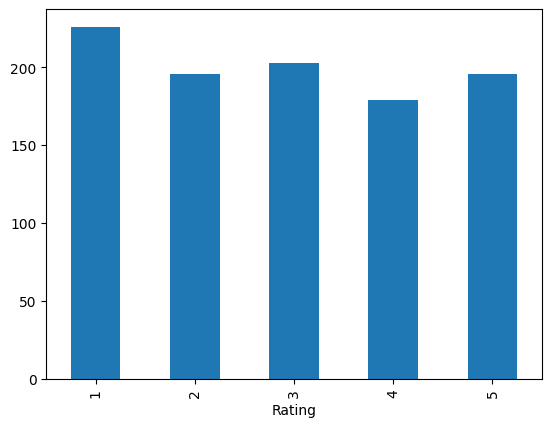

In [133]:
all_books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [134]:
all_books_df.to_csv("books.csv")

In [135]:
!git add tests/books.pickle

!git commit -m 'Completed books step'

!git push origin master

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   scraping.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
Everything up-to-date
